# Impoting libs and reading data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.simplefilter(action="ignore")

In [3]:
data = pd.read_csv(r"healthcare-dataset-stroke-data.csv")

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Data wrangling

In [6]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
data.duplicated().sum()

0

## Removing id column

In [8]:
data=data.drop(columns="id")

## Checking the NaN values

In [9]:
indices = data[data.isna().any(axis=1)].index
data[data.isna().any(axis=1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


## Adding extra column to group by age 

In [10]:
data["age_group"]=data["age"].apply(lambda x:"Infant" if (x>=0)&(x<=2)
                                  else ("Child" if (x>2)&(x<=12)
                                  else ("Adolescent"if (x>12)&(x<=18)  
                                  else ("Young Adults"if (x>19)&(x<=35)  
                                  else ("Middle Aged Adults" if (x>35)&(x<=60) 
                                  else "Old Aged Adults")))))

In [11]:
data.groupby(["gender","ever_married","age_group"])["bmi"].mean()

gender  ever_married  age_group         
Female  No            Adolescent            26.207558
                      Child                 19.534225
                      Infant                18.346341
                      Middle Aged Adults    30.200820
                      Old Aged Adults       29.691111
                      Young Adults          28.134084
        Yes           Middle Aged Adults    31.517157
                      Old Aged Adults       29.672853
                      Young Adults          30.543919
Male    No            Adolescent            25.529730
                      Child                 19.777523
                      Infant                18.988506
                      Middle Aged Adults    31.925352
                      Old Aged Adults       28.805882
                      Young Adults          28.603636
        Yes           Adolescent            27.400000
                      Middle Aged Adults    31.969624
                      Old Aged Adults    

## Cleaning up the na values using mean by gender,ever_married and age group

In [12]:
data['bmi'] = data['bmi'].fillna(data.groupby(["gender","ever_married","age_group"])["bmi"].transform('mean'))

In [13]:
data.iloc[indices,:]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.672853,never smoked,1,Old Aged Adults
8,Female,59.0,0,0,Yes,Private,Rural,76.15,31.517157,Unknown,1,Middle Aged Adults
13,Male,78.0,0,1,Yes,Private,Urban,219.84,29.967442,Unknown,1,Old Aged Adults
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,31.925352,Unknown,1,Middle Aged Adults
27,Male,58.0,0,0,Yes,Private,Rural,189.84,31.969624,Unknown,1,Middle Aged Adults
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,31.925352,formerly smoked,0,Middle Aged Adults
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,31.969624,smokes,0,Middle Aged Adults
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.517157,smokes,0,Middle Aged Adults
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,31.969624,smokes,0,Middle Aged Adults


## Checking for outliers

In [14]:
data.describe ()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.915485,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.722894,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.300000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


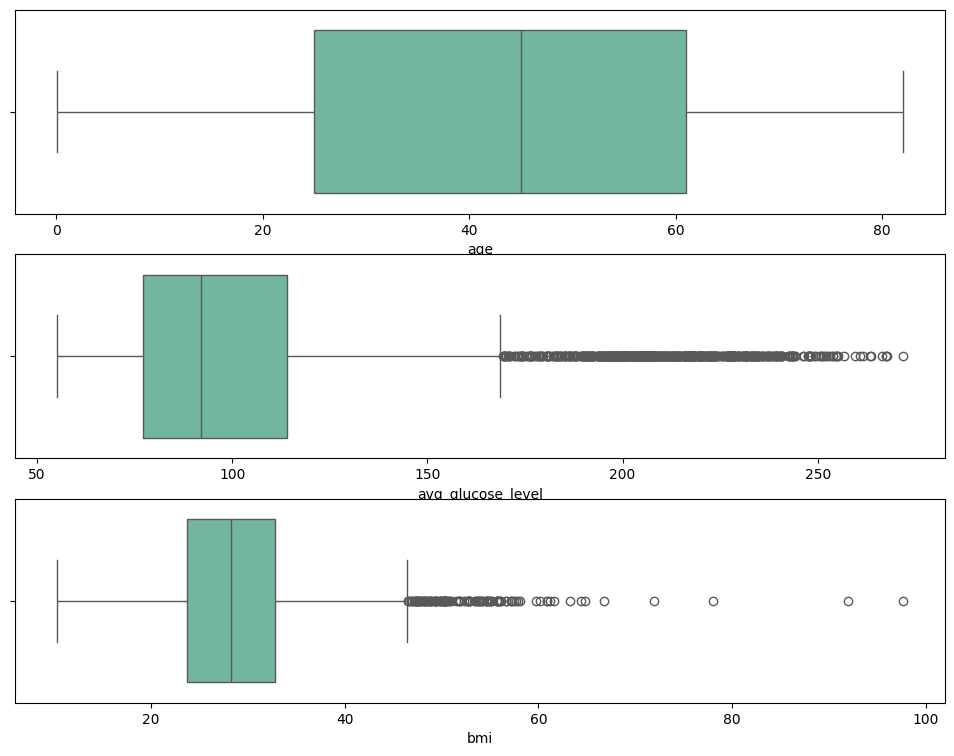

In [15]:
plt.figure(figsize=(12,9))
for i,col in enumerate(data.select_dtypes(float).columns):
    plt.subplot(3,1,i+1)
    sns.boxplot(data=data,x=col,palette =sns.color_palette("Set2"))

In [16]:
data.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

### * There is alot of outliers in bmi and avg glucose level However by searching online most of these values are normal so we just remove enough to be in the acceptable range

In [17]:
data = data[(data["bmi"]<66) & (data["bmi"]>12)]

In [18]:
data = data[(data["avg_glucose_level"]>56) & (data["avg_glucose_level"]<250)]

### There is only one row with other gender might as well remove it

In [19]:
data=data.drop(data[data["gender"]=="Other"].index)

In [20]:
data.shape

(5043, 12)

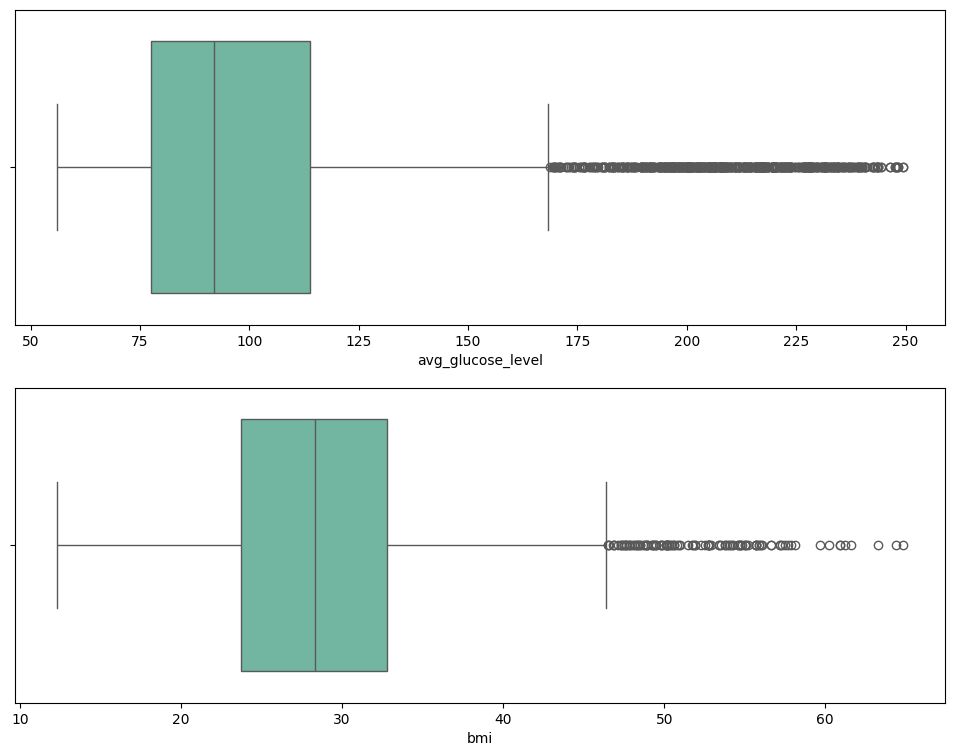

In [21]:
plt.figure(figsize=(12,9))
for i,col in enumerate(data.select_dtypes(float).columns[1:]):
    plt.subplot(2,1,i+1)
    sns.boxplot(data=data,x=col,palette =sns.color_palette("Set2"))

### * There is still outliers however removing these will be considered loss of information since these are true outliers

# Univariate Analysis

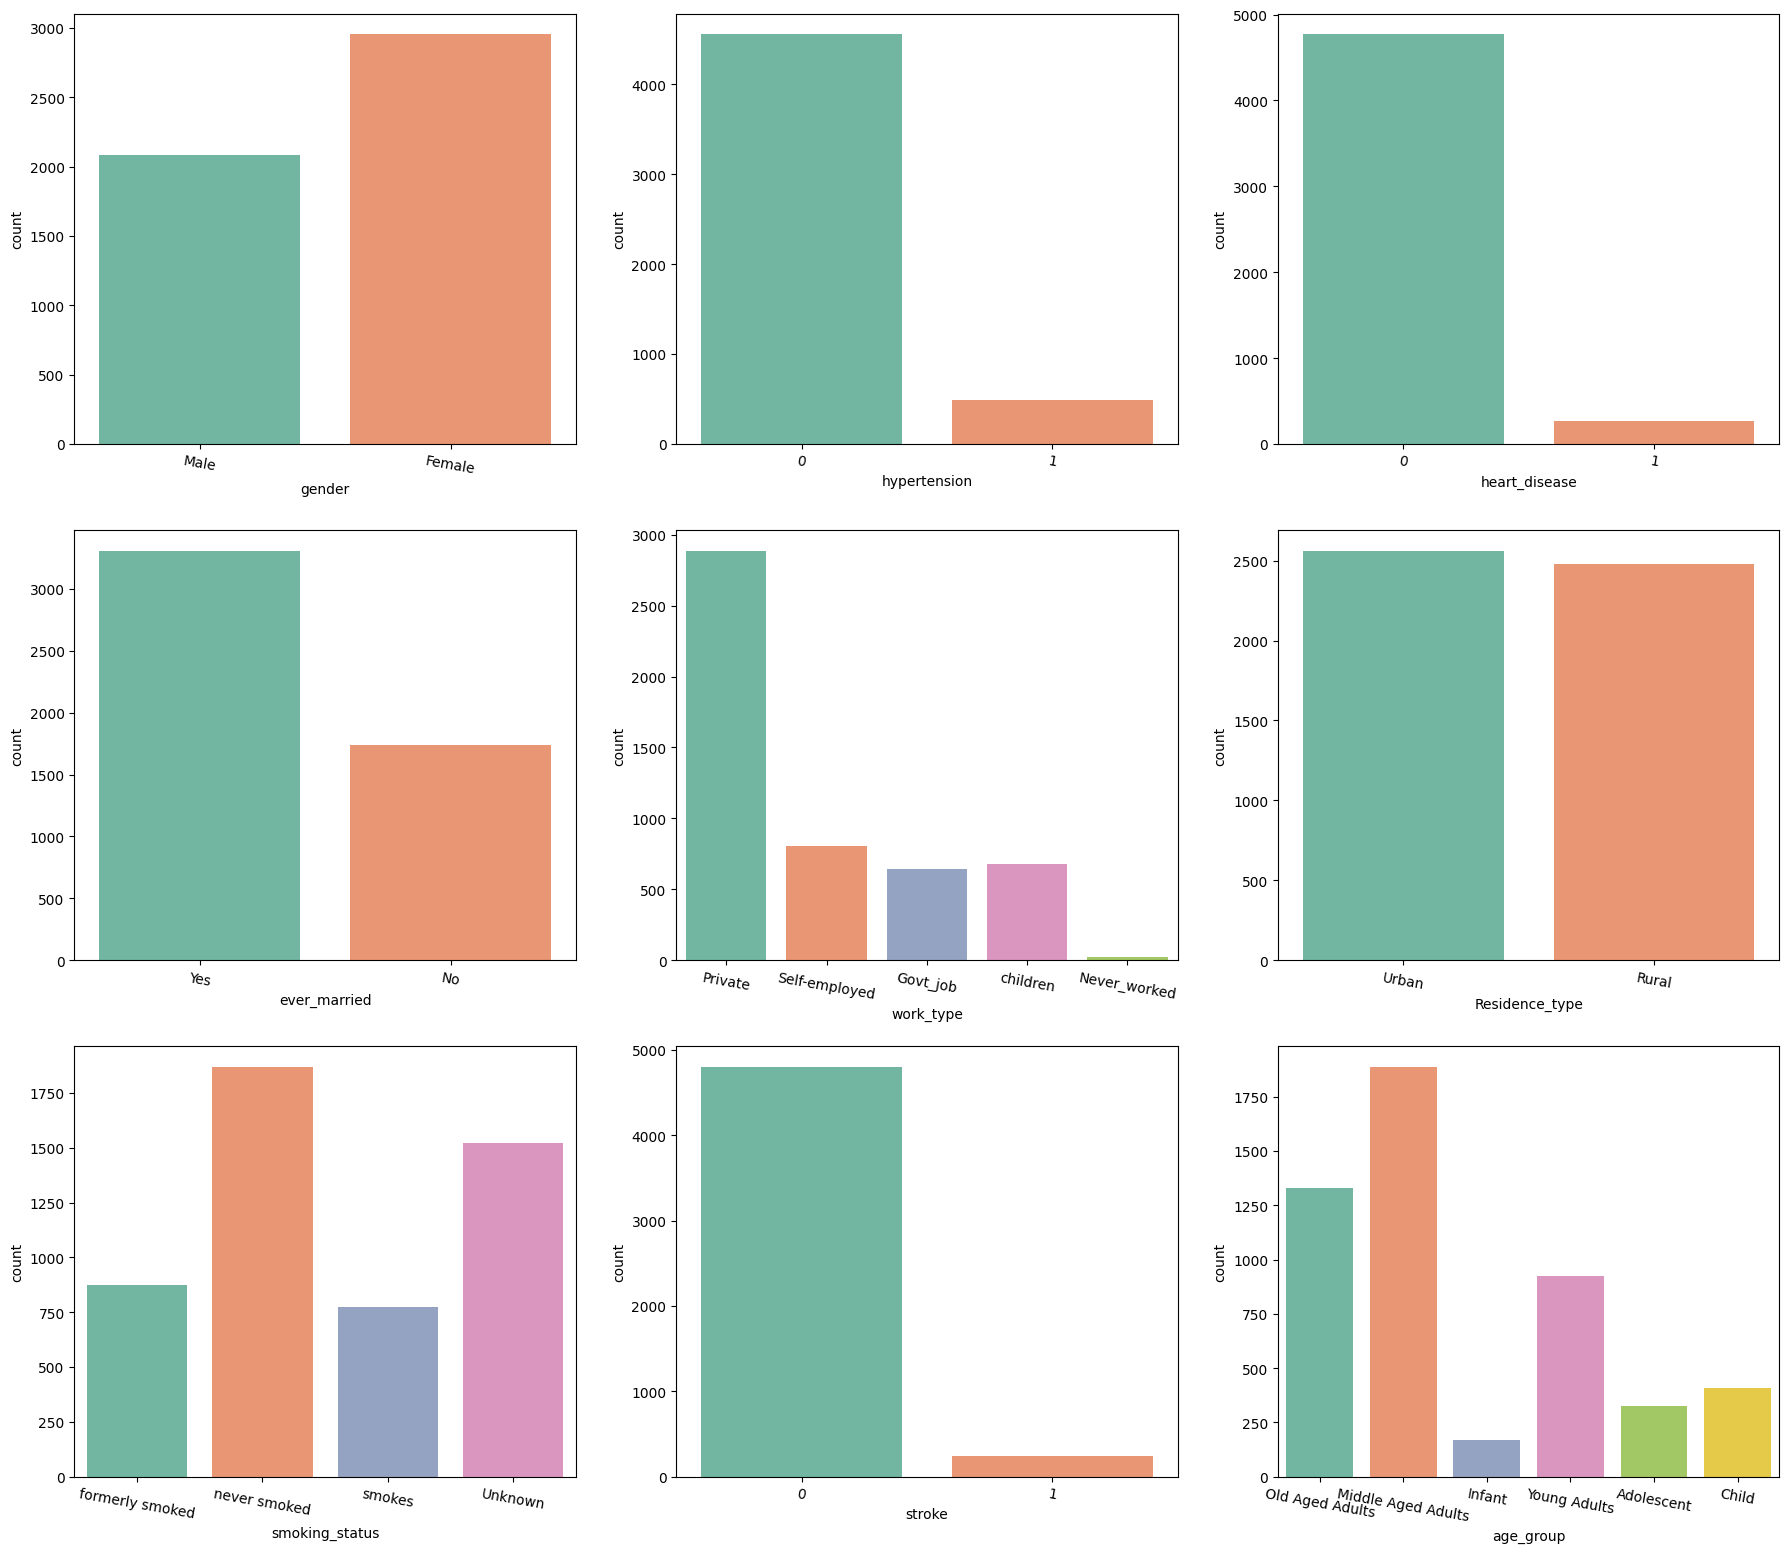

In [22]:
plt.figure(figsize=(22,19))
for i,col in enumerate(data.select_dtypes(exclude=float).columns):
    plt.subplot(3,3,i+1)
    sns.countplot(data=data,x=col,palette =sns.color_palette("Set2"))
    plt.xticks(rotation=-10)

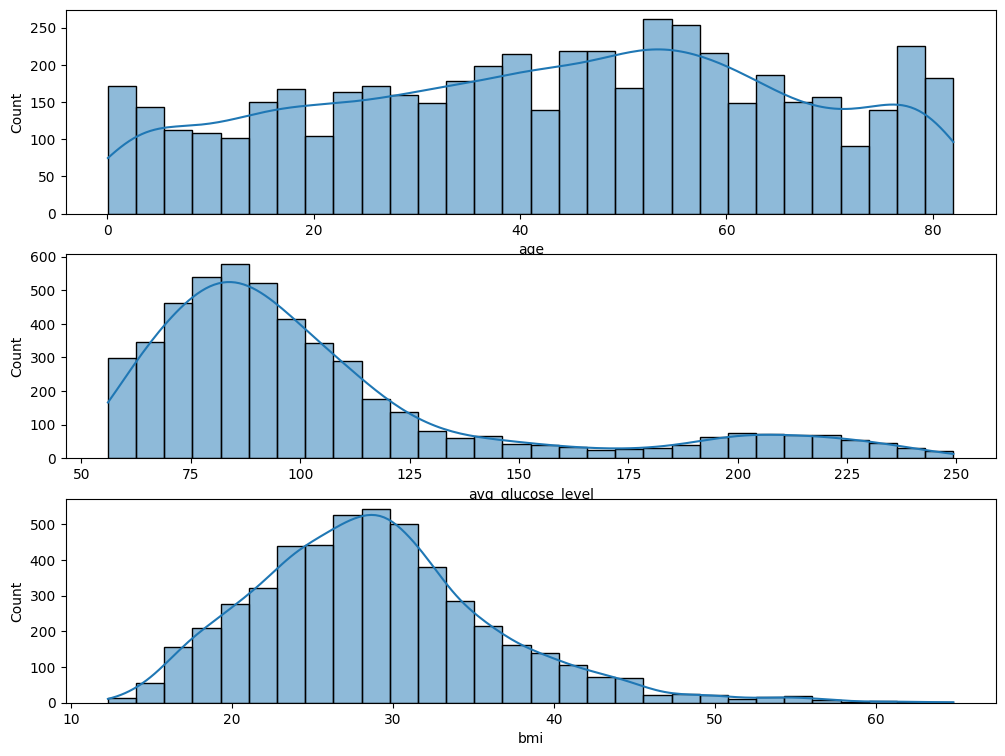

In [23]:
plt.figure(figsize=(12,9))
for i,col in enumerate(data.select_dtypes(float).columns):
    plt.subplot(3,1,i+1)
    sns.histplot(data=data,x=col,kde=True,bins=30,palette =sns.color_palette("Set2"))

# Multivariate Analysis

## Does gender affect having a stroke?

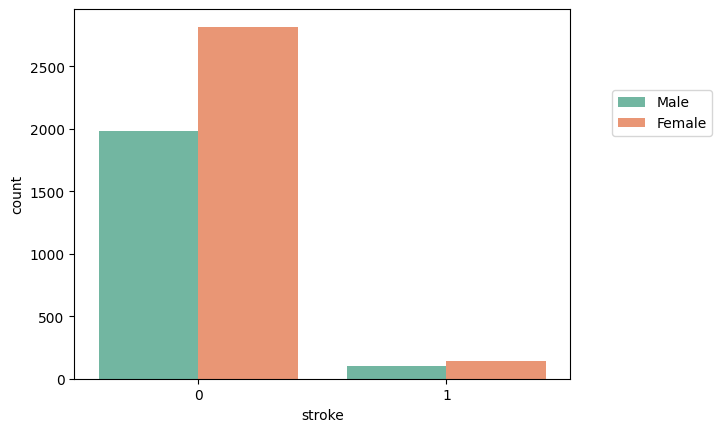

In [24]:
sns.countplot(data,x="stroke",hue="gender",palette =sns.color_palette("Set2"))
plt.legend(bbox_to_anchor =(1.3,0.8))

#### * No Gender has no relation

## Does age affect having a stroke?

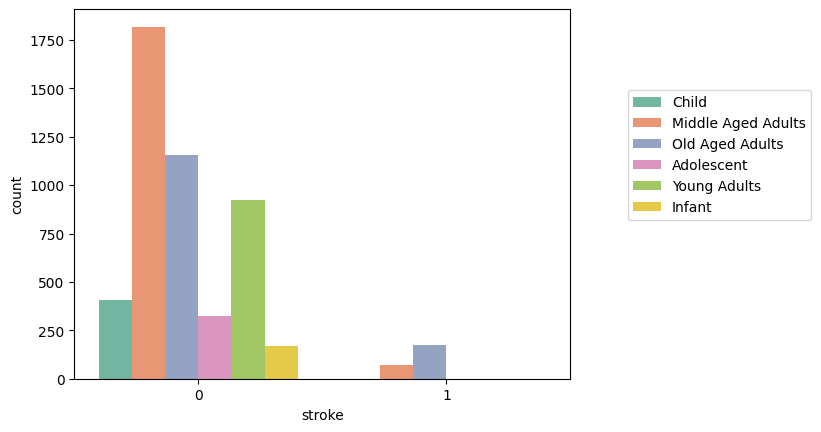

In [25]:
sns.countplot(data,x="stroke",hue="age_group",palette =sns.color_palette("Set2"))
plt.legend(bbox_to_anchor =(1.5,0.8))

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

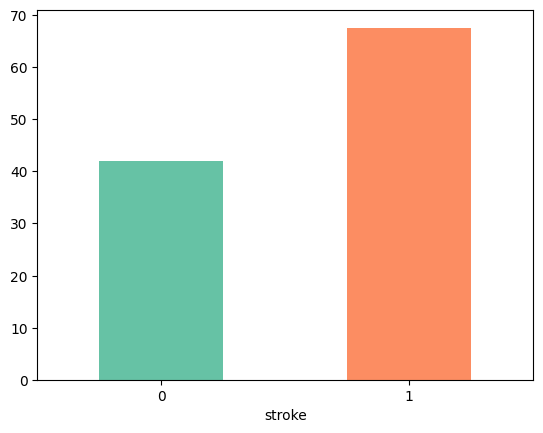

In [26]:
data.groupby("stroke")["age"].mean().plot(kind="bar",color = sns.color_palette("Set2"))
plt.xticks(rotation=0)

#### * Yes, stroke only happened in older people mainly old aged and middle aged adults

## Does work type affect having a stroke?

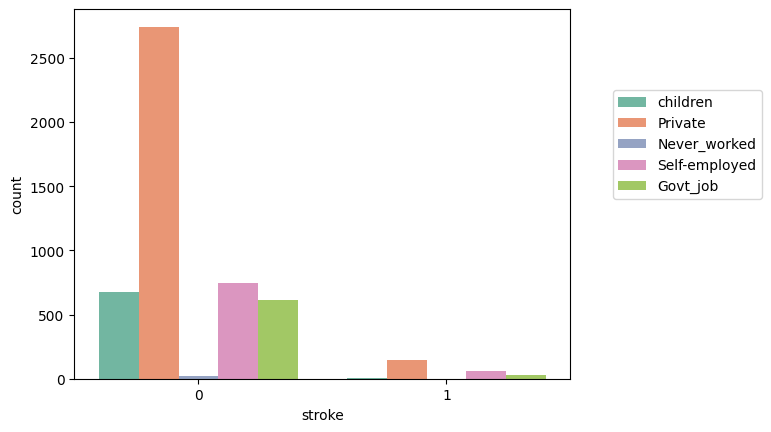

In [27]:
sns.countplot(data,x="stroke",hue="work_type",palette =sns.color_palette("Set2"))
plt.legend(bbox_to_anchor =(1.4,0.8))

#### * Yes but not by much, stroke happened more in private work than any other

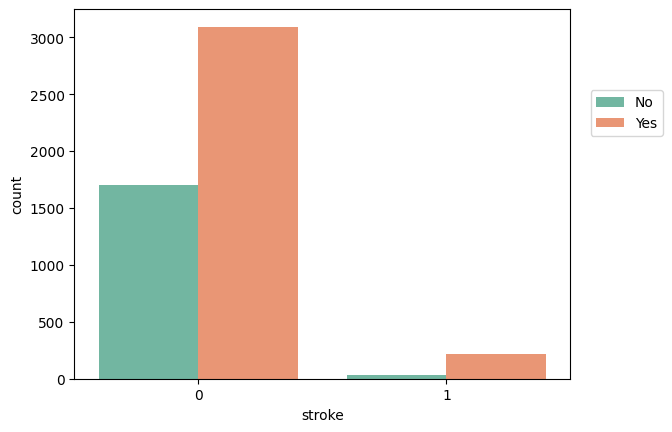

In [28]:
sns.countplot(data,x="stroke",hue="ever_married",palette =sns.color_palette("Set2"))
plt.legend(bbox_to_anchor =(1.2,0.8))

## Does smoking affect having a stroke?

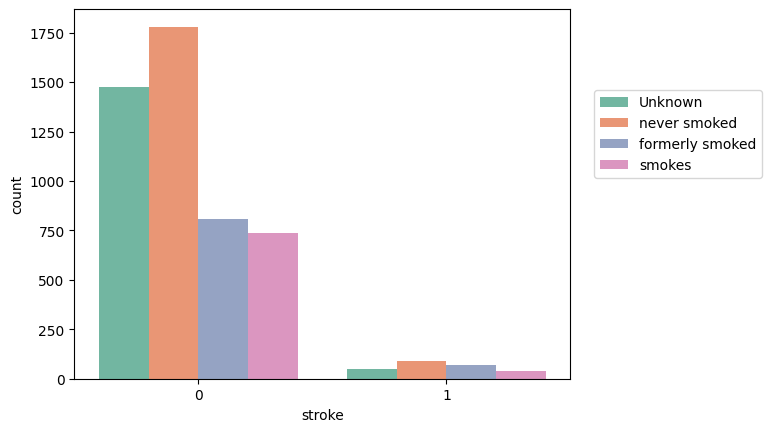

In [29]:
sns.countplot(data,x="stroke",hue="smoking_status",palette =sns.color_palette("Set2"))
plt.legend(bbox_to_anchor =(1.4,0.8))

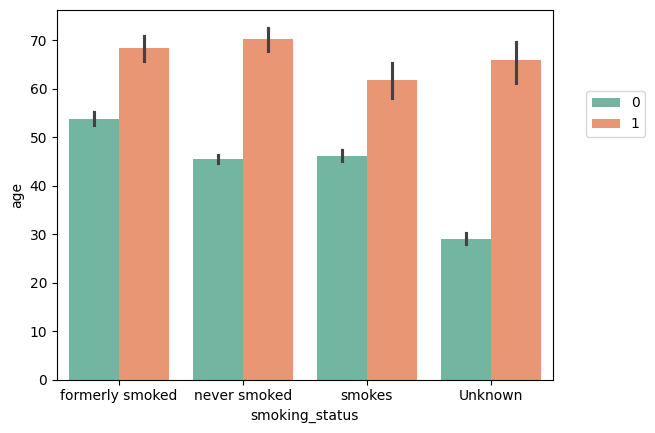

In [30]:
sns.barplot(data=data,x="smoking_status",y="age",hue="stroke",palette =sns.color_palette("Set2"))
plt.legend(bbox_to_anchor =(1.2,0.8))

#### * As seen above , people who never smoked and those who formerly smoked had the most strokes however when looking at age, the age of these 2 was higher than others so it could be attributed to age rather than smoking status

## Does hypertension affect having a stroke?

In [31]:
pd.crosstab(data.stroke,data.hypertension)

hypertension,0,1
stroke,,
0,4378,421
1,180,64


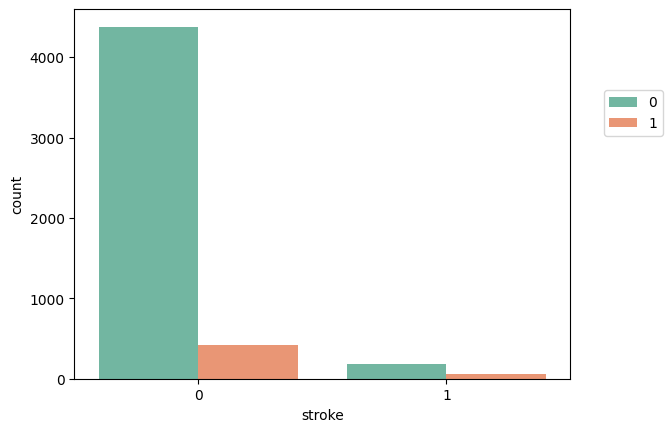

In [32]:
sns.countplot(data,x="stroke",hue="hypertension",palette =sns.color_palette("Set2"))
plt.legend(bbox_to_anchor =(1.2,0.8))

#### * Yes but not by much, people who have hypertension had more strokes

## Average bmi of people who had a stroke vs those who hasn't

In [33]:
data.groupby("stroke")["bmi"].mean()

stroke
0    28.814135
1    30.349006
Name: bmi, dtype: float64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

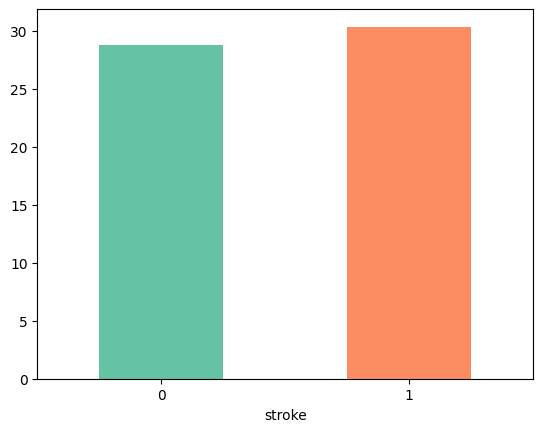

In [34]:
data.groupby("stroke")["bmi"].mean().plot(kind="bar",color =sns.color_palette("Set2"))
plt.xticks(rotation=0)

#### * Mostly the same with a slight increase in those who had a stroke at 30.3 vs those who hasn't at 28.8

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

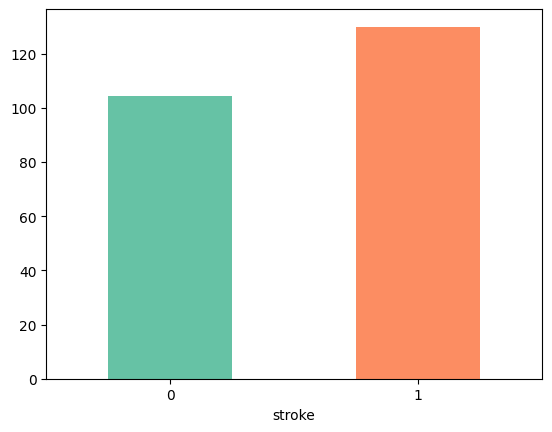

In [35]:
data.groupby("stroke")["avg_glucose_level"].mean().plot(kind="bar",color =sns.color_palette("Set2"))
plt.xticks(rotation=0)

# Importing libs for machine learning and transforming data

In [36]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.utils import resample

## Correlation between data attributes

In [37]:
corr_data =data.copy()
encoder  =LabelEncoder()
for col in corr_data.select_dtypes(include="object").columns:
    corr_data[col] =encoder.fit_transform(corr_data[col])

<Axes: >

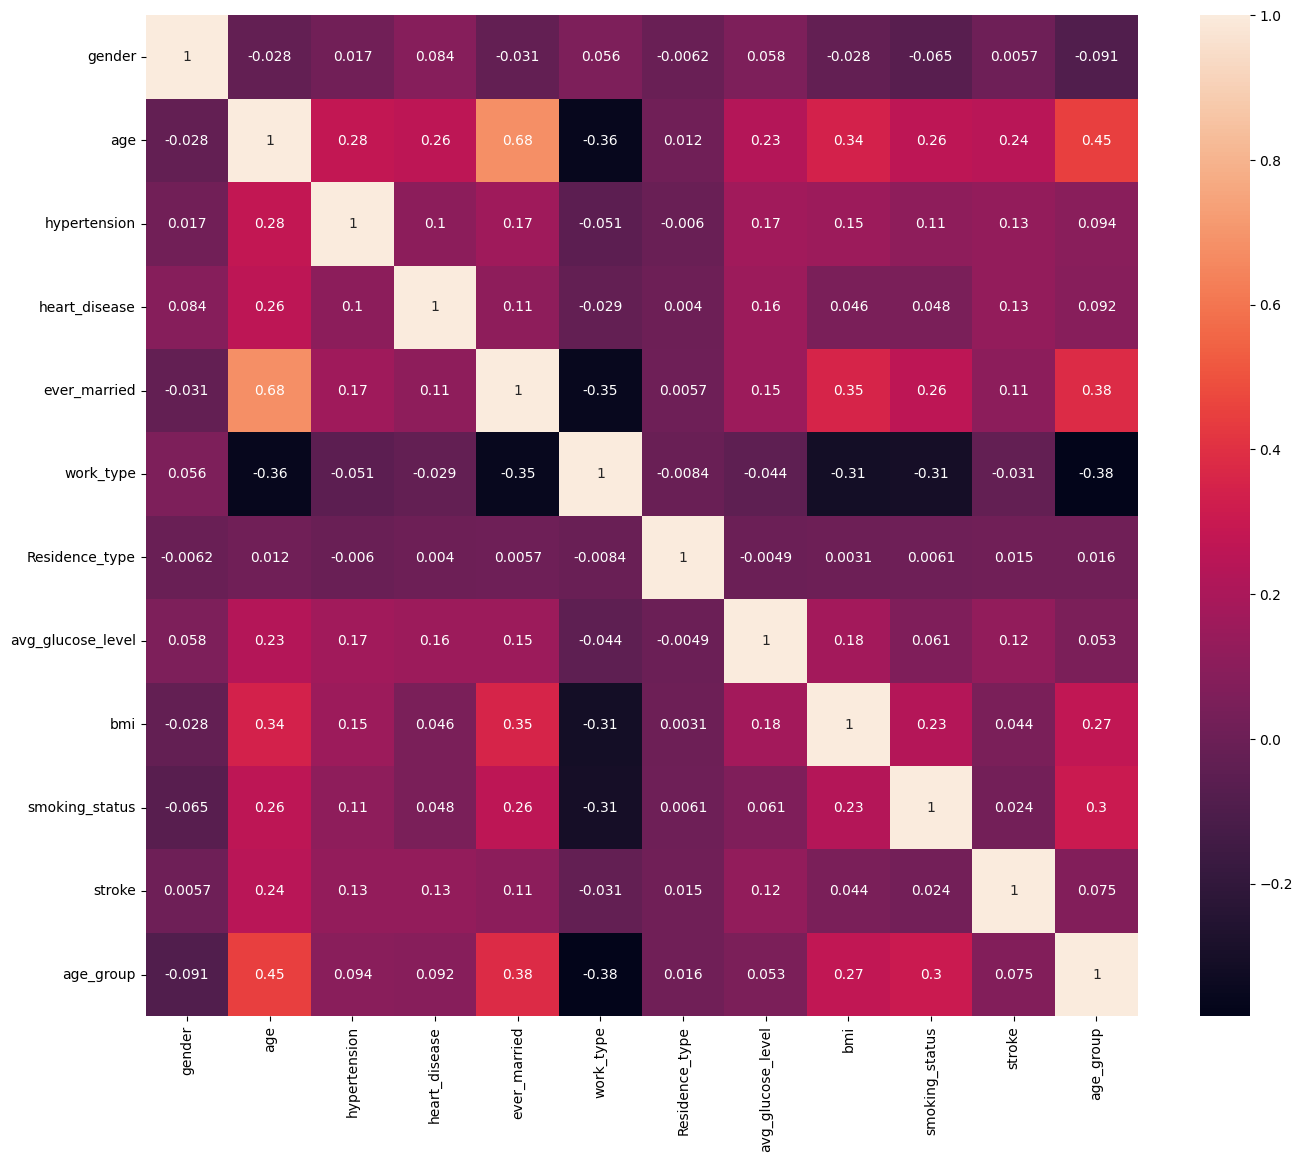

In [38]:
plt.figure(figsize=(16,13))
sns.heatmap(data=corr_data.corr(),annot=True)

## Upsampling the data

In [39]:
had_stroke = data[data["stroke"]==1]
no_stroke = data[data["stroke"]==0]
upsampled_had_stroke = resample(had_stroke,replace=True , n_samples=no_stroke.shape[0] , random_state=123 )
upsampled_data = pd.concat([no_stroke,upsampled_had_stroke])

<Axes: ylabel='count'>

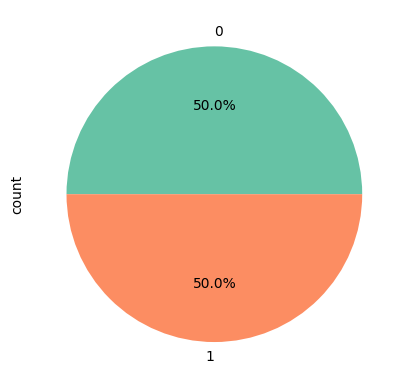

In [40]:
upsampled_data.stroke.value_counts().plot(kind = "pie",autopct="%0.1f%%",colors =sns.color_palette("Set2"))

In [41]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_group'],
      dtype='object')

# Encoding nominal data using pd dummies and ordinal using label encoder

In [42]:
cols = ['gender','hypertension','heart_disease', 'ever_married', 'work_type', 'Residence_type','smoking_status']
dums = pd.get_dummies(upsampled_data[cols],dtype=int)
model_data = pd.concat([upsampled_data,dums],axis=1).drop(columns=cols)

In [43]:
encoder = LabelEncoder()
model_data["age_group"] = encoder.fit_transform(model_data["age_group"])

# Normalizing the data using min max scaler

In [44]:
scaler = MinMaxScaler()
for col in ['age','avg_glucose_level','bmi']:
    scaler.fit(model_data[[col]])
    model_data[col]=scaler.transform(model_data[[col]])

In [45]:
model_data

,age,avg_glucose_level,bmi,stroke,age_group,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
249,0.035645,0.202080,0.108571,0,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0
250,0.707031,0.165028,0.512381,0,3,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
251,0.096680,0.283689,0.100952,0,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0
252,0.853516,0.067119,0.449524,0,4,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
253,0.169922,0.544452,0.129524,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.951172,0.012937,0.226667,1,4,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
229,0.975586,0.051542,0.440000,1,4,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0
29,0.719238,0.805786,0.374660,1,3,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
27,0.707031,0.692248,0.374660,1,3,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0


# Splitting the data and initalzing models

In [46]:
X = model_data.drop(columns="stroke")
y = model_data["stroke"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7,shuffle=True)

In [47]:
etc_model = ExtraTreesClassifier()
rfc_model = RandomForestClassifier(n_estimators=29,max_leaf_nodes=900,max_features=0.8,criterion="entropy")
xgb_model = XGBClassifier(objective="binary:logistic",eval_metric = "auc")
gbc_model = GradientBoostingClassifier(max_depth=29,min_samples_leaf=4,min_samples_split=13,subsample=0.8)

models = [etc_model,rfc_model,xgb_model,gbc_model]

# Training models and evaluating

In [48]:
for model in models:
    model.fit(X_train,y_train)

In [49]:
for model in models:
    model_name = type(model).__name__
    print(f"score for {model_name} on train data: {model.score(X_train,y_train)}")

score for ExtraTreesClassifier on train data: 1.0
score for RandomForestClassifier on train data: 1.0
score for XGBClassifier on train data: 0.9964834592341756
score for GradientBoostingClassifier on train data: 1.0


In [50]:
for model in models:
    model_name = type(model).__name__
    print(f"score for {model_name} on test data: {model.score(X_test,y_test)}")

score for ExtraTreesClassifier on test data: 0.99375
score for RandomForestClassifier on test data: 0.9838541666666667
score for XGBClassifier on test data: 0.9677083333333333
score for GradientBoostingClassifier on test data: 0.9864583333333333


## Classification report for each model

In [51]:
for model in models:
    y_predicted = model.predict(X_test)
    model_name = type(model).__name__
    print(f"Report:{model_name}")
    print(classification_report(y_test,y_predicted))
    

Report:ExtraTreesClassifier


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       987
           1       0.99      1.00      0.99       933

    accuracy                           0.99      1920
   macro avg       0.99      0.99      0.99      1920
weighted avg       0.99      0.99      0.99      1920

Report:RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       987
           1       0.97      1.00      0.98       933

    accuracy                           0.98      1920
   macro avg       0.98      0.98      0.98      1920
weighted avg       0.98      0.98      0.98      1920

Report:XGBClassifier
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       987
           1       0.94      1.00      0.97       933

    accuracy                           0.97      1920
   macro avg       0.97      0.97      0.97      1920
weighted avg       0.9

## Validation using kfold cross validation

In [52]:
print("scores of each model using kfold validation:-\n\n")
for model in models:
    score = cross_val_score(model,X,y,cv=10)
    avg = np.mean(score)
    model_name = type(model).__name__
    print(f"scores for {model_name}:{score}")
    print(f"average score for {model_name}:{avg}\n")

scores of each model using kfold validation:-


scores for ExtraTreesClassifier:[0.99375    0.99479167 0.98854167 0.99270833 0.98854167 0.996875
 0.996875   0.996875   0.99582899 0.99687174]
average score for ExtraTreesClassifier:0.9941659063260341

scores for RandomForestClassifier:[0.98229167 0.98541667 0.98541667 0.98541667 0.98229167 0.98958333
 0.990625   0.98958333 0.98957247 0.99061522]
average score for RandomForestClassifier:0.9870812695516162

scores for XGBClassifier:[0.97395833 0.97604167 0.971875   0.975      0.96875    0.97395833
 0.98125    0.98333333 0.97497393 0.9624609 ]
average score for XGBClassifier:0.9741601494612444

scores for GradientBoostingClassifier:[0.98958333 0.9875     0.990625   0.98854167 0.98333333 0.990625
 0.98958333 0.99270833 0.99061522 0.98852972]
average score for GradientBoostingClassifier:0.9891644942648592



## Confusion matrices for the models

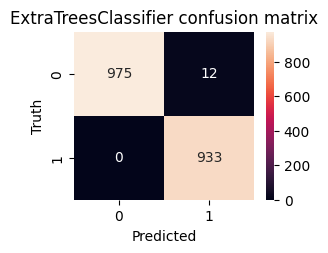

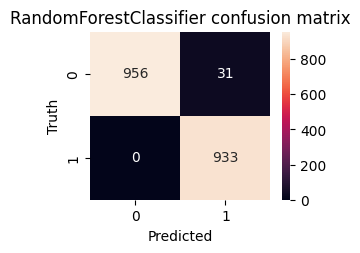

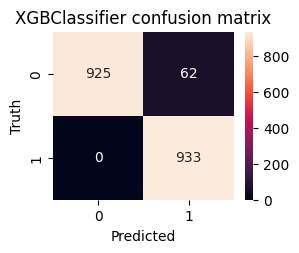

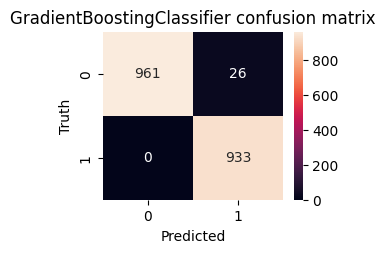

In [53]:
for i,model in enumerate(models):
    plt.subplot(2,2,i+1)
    y_predicted = model.predict(X_test)
    model_name = type(model).__name__
    cm = confusion_matrix(y_test, y_predicted)
    sns.heatmap(cm, annot=True,fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(f"{model_name} confusion matrix")
    plt.show()

### * The best model was Extra Trees Classifier followed by Gradient boosting , Random Forest  and XGboost
### * Accuracy for Extra Trees was 99% and  average cross validtation score of 99%
### * Accuracy for Random Forest  was 98% and  average cross validtation score of 98%
### * Accuracy for XGboost was 98% and  average cross validtation score of 97%
### * Accuracy for Gradient Boost was 98% and  average cross validtation score of 98%